In [3]:
'''Import all the necessary packages'''
from sklearn.cross_validation import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer, OneHotEncoder, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from patsy import dmatrix
from scipy import stats

import statsmodels.api as sm
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

C:\Users\win10\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\win10\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 분석의 개요 및 목적

-주어진 Data Set 을 통해 집값에 미치는 요인들을 분석하여 러시아 집값을 예측해본다.  

### 분석의 방법 및 범위





###### EDA(탐색적 자료 분석)

- 변수 탐색 및 데이터의 이해.
- 도메인 지식 확보 및 변수별 정의.
- 산점도 확인. 
- 변수 별 상관관계 확인.

###### Preprocessing(전처리)

* 데이터 중복 제거.
* 변수 스케일링.
* 아웃라이어 탐색.

###### Model Selection(회귀 모델 설정)

* 회귀 분석 후 변수 최종 선택 및 모델 설정.
* 크로스 밸리데이션.
* 회귀 모델군 상호 평가.

### EDA
주어진 Data Set
- train.csv : 21570rows, 292columns
- test.csw : 8901rows, 291columns
- macro.csv : 2484rows, 100coumns 

#### Macro는 적용 안 하기로 결정

In [4]:
'''Import the train and test data set'''
data_train = pd.read_csv('train.csv')
data_train.shape

(21570, 292)

### Column name preprocessing 
R style 모형에서는 '-'가 설명변수 제거라는 의미를 가지고 있기 때문에 잘못 읽히는 것을 방지하기 위해 이름을 바꾸었다.
* https://www.tutorialspoint.com/python/string_replace.htm -참조

In [5]:
def convert_column(data_train):
    data_train_columns = list(data_train.columns.values)
    for i in range(len(data_train_columns)):
        if '-' in data_train_columns[i]:
            data_train_columns[i] = data_train_columns[i].replace('-', '_')
        return data_train_columns 

In [26]:
X = data_train.iloc[:, 2:291]
y = data_train.iloc[:, 291]

0         6000000
1        13100000
2        16331452
3         5500000
4         2000000
5         5300000
6         2000000
7         4650000
8         4800000
9         5100000
10        5200000
11        5000000
12        6300000
13        5200000
14        5200000
15        1050000
16        5000000
17        4700000
18        8254400
19        5900000
20        6200000
21        4900000
22        4400000
23        3900000
24        4500000
25        2000000
26        2312800
27        6200000
28        5300000
29        5150000
           ...   
21540     6466434
21541    12697154
21542     7200000
21543     7491396
21544     9037925
21545    20000000
21546     8535937
21547    10000000
21548    25039300
21549     4350000
21550     7567425
21551    11438948
21552     6125400
21553     6888144
21554    12610000
21555     2394300
21556     6800000
21557     4066740
21558     1000000
21559     7800000
21560     6370777
21561     5778893
21562     9500000
21563    10544070
21564    1

### 데이터 분포 시각화

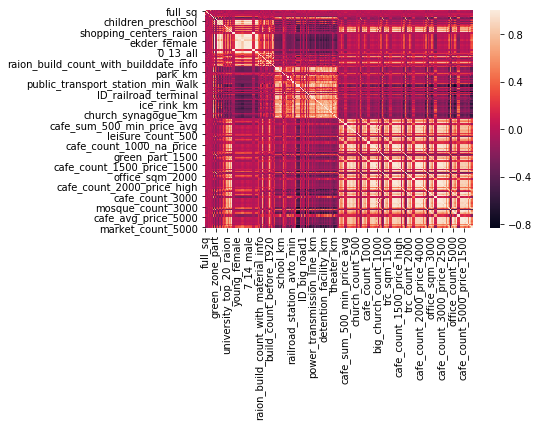

In [30]:
sns.heatmap(X.corr())
plt.show()

In [32]:
temp_df = data_train[['metro_min_avto', 'metro_km_avto', 'metro_km_walk', 'metro_min_walk', 'price_doc']]
temp_corr = temp_df.corr()
temp_df.corr()

,metro_min_avto,metro_km_avto,metro_km_walk,metro_min_walk,price_doc
metro_min_avto,1.000000,0.944435,0.938782,0.938782,-0.191054
metro_km_avto,0.944435,1.000000,0.986722,0.986722,-0.177329
metro_km_walk,0.938782,0.986722,1.000000,1.000000,-0.180889
metro_min_walk,0.938782,0.986722,1.000000,1.000000,-0.180889
price_doc,-0.191054,-0.177329,-0.180889,-0.180889,1.000000


In [33]:
temp_df = data_train[['railroad_station_avto_min', 'railroad_station_avto_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 'price_doc']]
temp_df.corr()

,railroad_station_avto_min,railroad_station_avto_km,railroad_station_walk_km,railroad_station_walk_min,price_doc
railroad_station_avto_min,1.000000,0.900364,0.882635,0.882635,-0.137919
railroad_station_avto_km,0.900364,1.000000,0.966488,0.966488,-0.130265
railroad_station_walk_km,0.882635,0.966488,1.000000,1.000000,-0.133119
railroad_station_walk_min,0.882635,0.966488,1.000000,1.000000,-0.133119
price_doc,-0.137919,-0.130265,-0.133119,-0.133119,1.000000


In [34]:
# mapping
mapping = {'yes': 1, 'no': 0}
raion_list = ['thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 
            'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion']
temp_df_raion = pd.DataFrame()
for raion in raion_list:
    temp_df_raion[raion] = data_train[raion].map(mapping)
temp_df = pd.concat([data_train['price_doc'], temp_df_raion], axis = 1)
model_chas = sm.OLS.from_formula("price_doc ~ thermal_power_plant_raion", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

C:\Users\win10\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\win10\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\win10\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
thermal_power_plant_raion,1.0,6.101264e+14,6.101264e+14,26.571404,2.562159e-07
Residual,21568.0,4.952394e+17,2.296177e+13,NaN,NaN
